In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_1','Unnamed: 0','text'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,_id,task_2,text_clean
0,4986,60c5d6bf5659ea5e55defa2c,PRFN,made amp amp onli abl start make money sustain...
1,3394,60c5d6bf5659ea5e55def461,OFFN,technic still turn back clock dick head
2,1310,60c5d6bf5659ea5e55defaad,NONE,govt stop think world media liber gang ani opt...
3,3390,60c5d6bf5659ea5e55def419,OFFN,soldier japan dick head
4,4626,60c5d6bf5659ea5e55def7fa,OFFN,would better ask think sleazi shitbag lmao


Text(0, 0.5, 'Frequency')

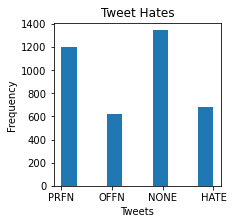

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_2'])

ax.set_title('Tweet Hates')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_2']

In [5]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 34  19  40   3]
 [ 46  58  60  33]
 [ 26  15  36  27]
 [  6  20  27 127]]


0.44194107452339687

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 13  69   8   6]
 [ 10 155   7  25]
 [  9  53   9  33]
 [  0  26   2 152]]


0.5701906412478336

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 40  36  18   2]
 [ 30 131  12  24]
 [ 37  21  16  30]
 [  1  15   3 161]]


0.6031195840554593

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 32  42  18   4]
 [ 29 124  19  25]
 [ 25  30  25  24]
 [  7  21  22 130]]


0.5389948006932409

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 34  42  15   5]
 [ 24 139   9  25]
 [ 22  41  14  27]
 [  3  21   8 148]]


0.5805892547660312

In [14]:
from sklearn.model_selection import RepeatedKFold 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report , accuracy_score
import pickle

In [25]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if score > bet_acc :
        print(score)
        bet_acc = score
        filename = 'finalized_svc_model1.sav'
        pickle.dump(sv, open(filename, 'wb'))

0.5558441558441558
0.5948051948051948
0.6311688311688312
0.6354166666666666
0.6380208333333334
0.65625
0.6614583333333334


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score
        filename = 'finalized_rfc_model1.sav'
        pickle.dump(rf, open(filename, 'wb'))

0.6649350649350649
0.6901041666666666


In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 
bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      classifier.fit(x_train,y_train)
      predictions = classifier.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score
        filename = 'finalized_Knc_model1.sav'
        pickle.dump(classifier, open(filename, 'wb'))

0.6
0.6015625
0.6067708333333334
0.6155844155844156
0.625
0.6467532467532467


In [24]:
from sklearn.model_selection import RepeatedKFold 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report , accuracy_score
import pickle

bnb = BernoulliNB()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X_train):
      x_train, x_test = X_train[train_index], X_train[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      bnb.fit(x_train,y_train)
      predictions = bnb.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score
        # save the model to disk
        filename = 'finalized_nb_model1.sav'
        pickle.dump(bnb, open(filename, 'wb'))

0.3149847094801223
0.3241590214067278
0.3394495412844037
0.34662576687116564
0.36809815950920244
0.3730886850152905
